In [1]:
import os
import torch

PATH = os.getcwd()+ "/dalle.pt"


In [12]:
from dalle_pytorch import DiscreteVAE

vae = DiscreteVAE(
    image_size = 256,
    num_layers = 3,           # number of downsamples - ex. 256 / (2 ** 3) = (32 x 32 feature map)
    num_tokens = 8192,        # number of visual tokens. in the paper, they used 8192, but could be smaller for downsized projects
    codebook_dim = 512,       # codebook dimension
    hidden_dim = 64,          # hidden dimension
    num_resnet_blocks = 1,    # number of resnet blocks
    temperature = 0.9,        # gumbel softmax temperature, the lower this is, the harder the discretization
    straight_through = False, # straight-through for gumbel softmax. unclear if it is better one way or the other
)

images = torch.randn(4, 3, 256, 256)

In [2]:
from dalle_pytorch import VQGanVAE
vae = VQGanVAE()


Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Loaded VQGAN from /home/user/.cache/dalle/vqgan.1024.model.ckpt and /home/user/.cache/dalle/vqgan.1024.config.yml


In [10]:
p = torch.load(PATH, map_location=torch.device('cpu'))

In [3]:
from dalle_pytorch import DiscreteVAE, DALLE

dalle = DALLE(
    dim = 1024,
    vae = vae,                  # automatically infer (1) image sequence length and (2) number of image tokens
    num_text_tokens = 10000,    # vocab size for text
    text_seq_len = 256,         # text sequence length
    depth = 12,                 # should aim to be 64
    heads = 16,                 # attention heads
    dim_head = 64,              # attention head dimension
    attn_dropout = 0.1,         # attention dropout
    ff_dropout = 0.1            # feedforward dropout
)

In [4]:
text = torch.randint(0, 10000, (4, 256))
images = torch.randn(4, 3, 256, 256)
mask = torch.ones_like(text).bool()

In [5]:
images = dalle.generate_images(text, mask = mask)
images.shape # (4, 3, 256, 256)

torch.Size([4, 3, 256, 256])

In [16]:
import matplotlib.pyplot as plt
import PIL
from torchvision.utils import make_grid
import numpy as np
import torchvision.transforms.functional as F

In [17]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

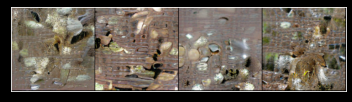

In [18]:
grid = make_grid(images)
show(grid)

In [20]:
from transformers import AutoTokenizer, DistilBertTokenizer

In [21]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
texts = ["a blue balloon", "red car", "big black cock", "scary clown"]
encoded_texts = tokenizer(
            [text for text in texts],
            padding=True,
            truncation=True,
            return_tensors="pt",
        )
images = torch.randn(4, 3, 256, 256)
mask = torch.ones_like(text).bool()

In [22]:
images = dalle.generate_images(text, mask = mask)

In [ ]:
grid = make_grid(images)
show(grid)